In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import learning_curve
%matplotlib inline
pd.set_option('display.max_columns', 500)
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


#### Power Conference Feature

From EDA we know that a small number of conferences account for 70% of all confernece wins. 

If one of the two teams is in a power conference, indicate the advantage that team has for winning the game.

In [2]:
# Compare the conferences of two teams playing in a game.
# If both teams are in power conference or both teams are not in a power conference return 0.
# If the opponent team is in a power conference and the first team is not in a power conference return -1
# If the first team is a power conference team and opponent is not then return 1.

def conf_compare(team_conf, opp_conf):
    team_top = team_conf in top_tournament_conferences_list
    opp_top = opp_conf in top_tournament_conferences_list
    if team_top == opp_top:
        return 0
    elif team_top :
        return 1
    else:
        return -1

In [3]:
def join_feature_name_with_importance_value(features, importances):
    """
    Join via a list of tuples, feature names with their importance values
    :param features: data frame whose features are represented by columns used by classifier
    :param importances: feature importance scores assigned by classifier
    :return: sorted list (highest importances first) of feature,importance tuples
    """
    if features.columns.shape[0] != importances.shape[0]:
        return []

    feature_importances = []
    for item in range(features.columns.shape[0]):
        feature_importances.append((features.columns[item], importances[item]))
    feature_importances_sorted = sorted(feature_importances, reverse=True, key=lambda kv: abs(kv[1]))

    return feature_importances_sorted


In [4]:
def display_important_features_regression(classifier, features):
    importances = classifier.coef_[0]
    #print("Importances: ", importances) 
    feature_importances = join_feature_name_with_importance_value(features, importances)
    print('Coefficient Values')
    for items in feature_importances:
        print(items[0]," ", items[1])

In [5]:
def get_tournament_record(df, season, round_, team):
    return df[(df['season_t'] == season) & (df['round']== round_) & (df['team']==team)]


In [6]:
def print_game_info(df, season, round_, team):
    t_rec = get_tournament_record(df, season, round_, team)
    opp_team = t_rec['opp_team'].iloc[0]
    print('\t\t',team,'\t',opp_team)
    print('Seed','\t\t',"%6d"%t_rec['team_seed'].iloc[0],'\t',"%6d"%t_rec['opp_team_seed'].iloc[0])
    print('PPG','\t\t',"%6.2f"%t_rec['pts_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['pts_avg_o'].iloc[0])
    print('Allow PPG','\t',"%6.2f"%t_rec['opp_pts_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['opp_pts_avg_o'].iloc[0])
    print('Poss Avg','\t',"%6.2f"%t_rec['poss_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['poss_avg_o'].iloc[0])
    print('FG %','\t\t',"%6.2f"%(100*t_rec['fg_pct_t'].iloc[0]),'\t',"%6.2f"%(100*t_rec['fg_pct_o'].iloc[0]))
    print('Allow FG %','\t',"%6.2f"%(100*t_rec['allow_fg_pct_t'].iloc[0]),'\t',"%6.2f"%(100*t_rec['allow_fg_pct_o'].iloc[0]))
    print('Off Rb Avg','\t',"%6.2f"%t_rec['off_rebs_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['off_rebs_avg_o'].iloc[0])
    print('Allow Off Rb Avg',"%6.2f"%t_rec['allow_off_rebs_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['allow_off_rebs_avg_o'].iloc[0])
    print('Def Rb Avg','\t',"%6.2f"%t_rec['def_rebs_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['def_rebs_avg_o'].iloc[0])
    print('Allow Def Rb Avg',"%6.2f"%t_rec['allow_def_rebs_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['allow_def_rebs_avg_o'].iloc[0])  
    print('FT ATT Avg','\t',"%6.2f"%t_rec['ft_att_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['ft_att_avg_o'].iloc[0]) 
    print('Allow FT ATT Avg',"%6.2f"%t_rec['allow_ft_att_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['allow_ft_att_avg_o'].iloc[0])
    print('FT %','\t\t',"%6.2f"%(100*t_rec['ft_pct_t'].iloc[0]),'\t',"%6.2f"%(100*t_rec['ft_pct_o'].iloc[0]))
    print('Turnover Avg','\t',"%6.2f"%t_rec['to_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['to_avg_o'].iloc[0])
    print('Takeaway Avg','\t',"%6.2f"%t_rec['steal_avg_t'].iloc[0],'\t',"%6.2f"%t_rec['steal_avg_o'].iloc[0])
    print('Win %','\t\t',"%6.2f"%(100*t_rec['win_pct_t'].iloc[0]),'\t',"%6.2f"%(100*t_rec['win_pct_o'].iloc[0]))
    print('Off Rating','\t',"%6.2f"%t_rec['off_rating_t'].iloc[0],'\t',"%6.2f"%t_rec['off_rating_o'].iloc[0])
    print('SRS Rating','\t',"%6.2f"%t_rec['SRS_t'].iloc[0],'\t',"%6.2f"%t_rec['SRS_o'].iloc[0])
    #print('SOS Rating','\t',"%6.2f"%t_rec['SOS_t'].iloc[0],'\t',"%6.2f"%t_rec['SOS_o'].iloc[0])
    print('\n\nTop Conference= ', t_rec['top_conf'].iloc[0])
    print('Game Result= ', t_rec['game_result'].iloc[0], ' (One indicates win for ', team,')')
    print('Predicted Result= ', t_rec['predicted_result'].iloc[0])
    print('Predicted Probability= ',"%6.3f"%t_rec['pred_win_prob'].iloc[0])
    return

#### Read in regular season team statistics from SRCBB https://www.sports-reference.com/cbb/

In [7]:
#Note season indicates start of season, e.g. 2013 to 2014, the corresponding tournament season is 1 greater than this value
# The tournament season for season 2013 is 2014
summary_data = pd.read_csv('sr_summaries_kaggle_id.csv')
print(summary_data.shape)

#display rows with NaNs
summary_data[summary_data.isnull().any(axis=1)]


(2773, 22)


,season,School,team_id,Games,SRS,SOS,win_pct,pts_avg,opp_pts_avg,fg_pct,allow_fg_pct,ft_pct,allow_ft_att_avg,poss_avg,off_rebs_avg,allow_off_rebs_avg,def_rebs_avg,allow_def_rebs_avg,to_avg,steal_avg,off_rating,ft_att_avg
38,2009,Centenary (LA),NaN,29,-17.16,-5.08,0.276,70,80,0.416,0.49,0.733,25,80.641379,9,11,20,27,15,7,86.804071,21


In [8]:
#drop records with NaNs
summary_data.dropna(inplace=True)
print(summary_data.shape)


(2772, 22)


#### Read table of team names and associated team meta data from the Kaggle data set.

https://console.cloud.google.com/bigquery?project=bigqueryncaa&p=bigquery-public-data&d=ncaa_basketball&page=dataset

In [9]:
# Read table of team names and associated team meta data
teams = pd.read_csv('D1_teams.csv')
teams.drop(columns=['code_ncaa','school_ncaa','turner_name','league_name','league_alias','conf_alias',
                    'conf_id','division_name','division_alias','division_id',
                    'kaggle_team_id','venue_id'], inplace=True)
teams.info()
teams.set_index('id',inplace=True)
teams.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
id           351 non-null object
conf_name    351 non-null object
dtypes: object(2)
memory usage: 5.6+ KB


,conf_name
id,
fe406882-9f22-495e-9df6-ef357a6803c6,Ivy
ca478771-aa3d-4231-81e0-b70f519134fb,Ivy
5c7bf63f-bc39-43c5-9907-73b50b7a6b34,Ivy
d60357bd-1205-42e9-9092-d986a2843a34,Ivy
88ff8c00-958e-4ccf-a21d-77fab9e93692,Ivy


#### Read in the NCAA Men's Tournament results from the the Kaggle data set.

In [10]:
tourney_data = pd.read_csv('tournament_results.csv')
tourney_data.drop(columns=['days_from_epoch','day','num_ot','academic_year','win_region','win_alias','lose_region',
                           'lose_alias','lose_code_ncaa','win_school_ncaa','win_code_ncaa','win_name','lose_name',
                           'win_pts','win_kaggle_team_id','lose_school_ncaa','lose_kaggle_team_id','lose_pts'],inplace=True)

tourney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 9 columns):
season          2117 non-null int64
round           2117 non-null int64
game_date       2117 non-null object
win_seed        2117 non-null int64
win_market      2117 non-null object
win_team_id     2117 non-null object
lose_seed       2117 non-null int64
lose_market     2117 non-null object
lose_team_id    2117 non-null object
dtypes: int64(4), object(5)
memory usage: 148.9+ KB


### Extract some historical data

In [11]:
game_data = tourney_data.join(teams, on='win_team_id',how='left')
game_data.rename(columns={'kaggle_team_id':'win_kaggle_team_id','conf_name':'win_conf_name'}, inplace=True)
game_data = game_data.join(teams,on='lose_team_id',how='left')
game_data.rename(columns={'kaggle_team_id':'lose_kaggle_team_id','conf_name':'lose_conf_name'}, inplace=True)
games_won_conf = game_data.groupby('win_conf_name').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

games_won_conf['percent'] = 100 * games_won_conf['count']/games_won_conf['count'].sum()
games_won_conf['cum_percent'] = games_won_conf['percent'].cumsum()
games_won_conf.head()

,win_conf_name,count,percent,cum_percent
3,Atlantic Coast,431,20.358999,20.358999
9,Big Ten,313,14.785073,35.144072
24,Southeastern,269,12.706660,47.850732
5,Big 12,231,10.911667,58.762400
22,Pacific 12,197,9.305621,68.068021


Identify the conferences that have won 70% of all conference games

In [12]:
top_tournament_conferences_list = games_won_conf[games_won_conf['cum_percent']<= 70]['win_conf_name'].tolist()
top_tournament_conferences_list

['Atlantic Coast', 'Big Ten', 'Southeastern', 'Big 12', 'Pacific 12']

In [13]:
tourney_data.describe()['season']

count    2117.000000
mean     2001.193198
std         9.563883
min      1985.000000
25%      1993.000000
50%      2001.000000
75%      2010.000000
max      2017.000000
Name: season, dtype: float64

Note the tournament data is available for tournament years 1985 through 2017.

In [14]:
summary_data.describe()['season']

count    2772.00000
mean     2012.53355
std         2.28420
min      2009.00000
25%      2011.00000
50%      2013.00000
75%      2015.00000
max      2016.00000
Name: season, dtype: float64

The summary season data in this set goes back to 2010. If more training data is needed we can go back to earlier seasons.

So the intersection of season summary data with tournament data are regular seasons 2010 through 2016.

In [15]:
tourney_data = tourney_data[tourney_data['season'] >= 2011]
tourney_data.describe()['season']

count     469.000000
mean     2014.000000
std         2.002136
min      2011.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2017.000000
Name: season, dtype: float64

In [16]:
tourney_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 10 to 2104
Data columns (total 9 columns):
season          469 non-null int64
round           469 non-null int64
game_date       469 non-null object
win_seed        469 non-null int64
win_market      469 non-null object
win_team_id     469 non-null object
lose_seed       469 non-null int64
lose_market     469 non-null object
lose_team_id    469 non-null object
dtypes: int64(4), object(5)
memory usage: 36.6+ KB


In [17]:
tourney_data.head()

,season,round,game_date,win_seed,win_market,win_team_id,lose_seed,lose_market,lose_team_id
10,2013,64,2013-03-22,9,Temple,8598d1b6-106b-4083-a512-2e495729525a,8,North Carolina State,52df1e19-b142-4a76-a439-ad68455d0581
17,2011,64,2011-03-17,7,Temple,8598d1b6-106b-4083-a512-2e495729525a,10,Penn State,4aebd148-8119-4875-954c-66779867989b
27,2013,64,2013-03-21,5,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,12,Akron,56fe0ab2-e4f0-47b9-8726-9ce23ebcde20
29,2012,64,2012-03-15,12,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,5,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5
30,2011,8,2011-03-27,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,1,Kansas,fae4855b-1b64-4b40-a632-9ed345e1e952


In [18]:
# recode the tourney data so that the teams are not marked with  win/lose status and the game result is encoded as a binary
tourney_data['game_result'] = 1
tourney_data.game_result = tourney_data.game_result.astype(int)
tourney_data.rename(columns={"win_seed":"team_seed","win_market":"team","win_team_id":"team_id"}, inplace=True)
tourney_data.rename(columns={"lose_seed":"opp_team_seed","lose_market":"opp_team","lose_team_id":"opp_team_id"}, inplace=True)
tourney_data['start_season'] = tourney_data['season'] -1
tourney_data


,season,round,game_date,team_seed,team,team_id,opp_team_seed,opp_team,opp_team_id,game_result,start_season
10,2013,64,2013-03-22,9,Temple,8598d1b6-106b-4083-a512-2e495729525a,8,North Carolina State,52df1e19-b142-4a76-a439-ad68455d0581,1,2012
17,2011,64,2011-03-17,7,Temple,8598d1b6-106b-4083-a512-2e495729525a,10,Penn State,4aebd148-8119-4875-954c-66779867989b,1,2010
27,2013,64,2013-03-21,5,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,12,Akron,56fe0ab2-e4f0-47b9-8726-9ce23ebcde20,1,2012
29,2012,64,2012-03-15,12,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,5,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5,1,2011
30,2011,8,2011-03-27,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,1,Kansas,fae4855b-1b64-4b40-a632-9ed345e1e952,1,2010
31,2011,16,2011-03-25,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,10,Florida State,d3c8a767-b6fc-45d4-a5f2-18406f2993f1,1,2010
33,2011,32,2011-03-20,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,3,Purdue,12d7f888-675b-459f-9099-a38f771d8a95,1,2010
34,2011,64,2011-03-18,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,6,Georgetown,8736b67f-5924-400b-bf94-3bd804c36600,1,2010
35,2011,68,2011-03-16,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,11,USC,3a000455-de7c-4ca8-880e-abdce7f21da9,1,2010
36,2016,64,2016-03-18,10,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,7,Oregon State,532d3874-b4b3-4c5c-acc6-749a6db26c8f,1,2015


In [19]:
# We need to recode the game data so that we have representation of the losing game result class.
# Swap the team and opp team data on the odd rows and reverse the sense of the game result.

#create some temporary buffer columns
tourney_data['copy_team'] = tourney_data['team']
tourney_data['copy_team_seed'] = tourney_data['team_seed']
tourney_data['copy_team_id'] = tourney_data['team_id']

#swap the team and opp team data
tourney_data.loc[1::2,'team'] = tourney_data.loc[1::2,'opp_team']
tourney_data.loc[1::2,'opp_team'] = tourney_data.loc[1::2,'copy_team']
tourney_data.loc[1::2,'team_seed'] = tourney_data.loc[1::2,'opp_team_seed']
tourney_data.loc[1::2,'opp_team_seed'] = tourney_data.loc[1::2,'copy_team_seed']
tourney_data.loc[1::2,'team_id'] = tourney_data.loc[1::2,'opp_team_id']
tourney_data.loc[1::2,'opp_team_id'] = tourney_data.loc[1::2,'copy_team_id']

# flip the game result
tourney_data.loc[1::2,'game_result'] = 0

#drop the temporary columns
tourney_data.drop(columns=['copy_team','copy_team_seed','copy_team_id'],inplace=True)
tourney_data.head()

,season,round,game_date,team_seed,team,team_id,opp_team_seed,opp_team,opp_team_id,game_result,start_season
10,2013,64,2013-03-22,8,North Carolina State,52df1e19-b142-4a76-a439-ad68455d0581,9,Temple,8598d1b6-106b-4083-a512-2e495729525a,0,2012
17,2011,64,2011-03-17,7,Temple,8598d1b6-106b-4083-a512-2e495729525a,10,Penn State,4aebd148-8119-4875-954c-66779867989b,1,2010
27,2013,64,2013-03-21,12,Akron,56fe0ab2-e4f0-47b9-8726-9ce23ebcde20,5,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,0,2012
29,2012,64,2012-03-15,12,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,5,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5,1,2011
30,2011,8,2011-03-27,1,Kansas,fae4855b-1b64-4b40-a632-9ed345e1e952,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,0,2010


In [20]:

tourney_data = tourney_data.merge(summary_data, left_on=['start_season','team_id'], 
                                right_on=['season', 'team_id'],how='left',suffixes=('','_y'))

tourney_data.drop(columns=['season_y'],inplace=True)
tourney_data.describe()

,season,round,team_seed,opp_team_seed,game_result,start_season,Games,SRS,SOS,win_pct,pts_avg,opp_pts_avg,fg_pct,allow_fg_pct,ft_pct,allow_ft_att_avg,poss_avg,off_rebs_avg,allow_off_rebs_avg,def_rebs_avg,allow_def_rebs_avg,to_avg,steal_avg,off_rating,ft_att_avg
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2014.000000,44.805970,7.132196,7.345416,0.498934,2013.000000,35.837953,14.375139,5.725778,0.744311,73.298507,64.255864,0.458851,0.411640,0.710539,17.904051,76.729769,10.791045,10.023454,23.707889,21.972281,11.270789,6.221748,95.572509,20.923241
std,2.002136,22.479399,4.761806,4.713148,0.500533,2.002136,2.089700,7.756872,4.892262,0.101390,4.859173,4.781396,0.022766,0.021989,0.034649,2.748225,3.846108,1.684217,1.330720,2.346565,1.659368,1.462209,1.261645,5.049279,2.555887
min,2011.000000,2.000000,1.000000,1.000000,0.000000,2010.000000,30.000000,-13.370000,-10.310000,0.417000,59.000000,51.000000,0.394000,0.354000,0.603000,11.000000,63.960000,5.000000,7.000000,18.000000,18.000000,7.000000,3.000000,77.919708,13.000000
25%,2012.000000,32.000000,3.000000,3.000000,0.000000,2011.000000,34.000000,11.240000,4.130000,0.676000,70.000000,61.000000,0.444000,0.395000,0.686000,16.000000,74.684848,10.000000,9.000000,22.000000,21.000000,10.000000,5.000000,92.345893,19.000000
50%,2014.000000,64.000000,7.000000,7.000000,0.000000,2013.000000,36.000000,15.480000,7.620000,0.750000,73.000000,65.000000,0.458000,0.412000,0.709000,18.000000,76.515789,11.000000,10.000000,24.000000,22.000000,11.000000,6.000000,95.554872,21.000000
75%,2016.000000,64.000000,11.000000,11.000000,1.000000,2015.000000,37.000000,19.690000,9.070000,0.800000,77.000000,67.000000,0.474000,0.425000,0.734000,20.000000,79.171429,12.000000,11.000000,25.000000,23.000000,12.000000,7.000000,99.287345,23.000000
max,2017.000000,68.000000,16.000000,16.000000,1.000000,2016.000000,41.000000,28.720000,12.230000,0.974000,89.000000,78.000000,0.522000,0.495000,0.818000,28.000000,86.810000,16.000000,14.000000,31.000000,26.000000,15.000000,10.000000,107.777180,30.000000


In [21]:
tourney_data = tourney_data.merge(summary_data, left_on=['start_season','opp_team_id'], 
                                right_on=['season', 'team_id'], how='left',suffixes=('_t','_o'))
#tourney_data.info()

In [22]:
tourney_data.describe()

,season_t,round,team_seed,opp_team_seed,game_result,start_season,Games_t,SRS_t,SOS_t,win_pct_t,pts_avg_t,opp_pts_avg_t,fg_pct_t,allow_fg_pct_t,ft_pct_t,allow_ft_att_avg_t,poss_avg_t,off_rebs_avg_t,allow_off_rebs_avg_t,def_rebs_avg_t,allow_def_rebs_avg_t,to_avg_t,steal_avg_t,off_rating_t,ft_att_avg_t,season_o,Games_o,SRS_o,SOS_o,win_pct_o,pts_avg_o,opp_pts_avg_o,fg_pct_o,allow_fg_pct_o,ft_pct_o,allow_ft_att_avg_o,poss_avg_o,off_rebs_avg_o,allow_off_rebs_avg_o,def_rebs_avg_o,allow_def_rebs_avg_o,to_avg_o,steal_avg_o,off_rating_o,ft_att_avg_o
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2014.000000,44.805970,7.132196,7.345416,0.498934,2013.000000,35.837953,14.375139,5.725778,0.744311,73.298507,64.255864,0.458851,0.411640,0.710539,17.904051,76.729769,10.791045,10.023454,23.707889,21.972281,11.270789,6.221748,95.572509,20.923241,2013.000000,35.827292,14.028038,5.795203,0.736113,73.411514,64.816631,0.459083,0.414190,0.709235,17.957356,76.955509,10.795309,10.108742,23.631130,21.976546,11.411514,6.202559,95.435353,20.859275
std,2.002136,22.479399,4.761806,4.713148,0.500533,2.002136,2.089700,7.756872,4.892262,0.101390,4.859173,4.781396,0.022766,0.021989,0.034649,2.748225,3.846108,1.684217,1.330720,2.346565,1.659368,1.462209,1.261645,5.049279,2.555887,2.002136,2.195085,7.591618,4.928852,0.095084,4.937554,4.589618,0.022139,0.020946,0.033761,2.745294,3.950489,1.786912,1.359875,2.371116,1.720131,1.507515,1.392714,4.987337,2.701184
min,2011.000000,2.000000,1.000000,1.000000,0.000000,2010.000000,30.000000,-13.370000,-10.310000,0.417000,59.000000,51.000000,0.394000,0.354000,0.603000,11.000000,63.960000,5.000000,7.000000,18.000000,18.000000,7.000000,3.000000,77.919708,13.000000,2010.000000,30.000000,-10.900000,-12.120000,0.412000,59.000000,54.000000,0.394000,0.354000,0.616000,11.000000,63.960000,5.000000,7.000000,18.000000,18.000000,7.000000,3.000000,80.000000,13.000000
25%,2012.000000,32.000000,3.000000,3.000000,0.000000,2011.000000,34.000000,11.240000,4.130000,0.676000,70.000000,61.000000,0.444000,0.395000,0.686000,16.000000,74.684848,10.000000,9.000000,22.000000,21.000000,10.000000,5.000000,92.345893,19.000000,2011.000000,34.000000,10.800000,4.010000,0.676000,70.000000,62.000000,0.444000,0.401000,0.686000,16.000000,74.833333,10.000000,9.000000,22.000000,21.000000,10.000000,5.000000,91.767881,19.000000
50%,2014.000000,64.000000,7.000000,7.000000,0.000000,2013.000000,36.000000,15.480000,7.620000,0.750000,73.000000,65.000000,0.458000,0.412000,0.709000,18.000000,76.515789,11.000000,10.000000,24.000000,22.000000,11.000000,6.000000,95.554872,21.000000,2013.000000,35.000000,15.260000,7.570000,0.743000,73.000000,65.000000,0.459000,0.414000,0.708000,18.000000,76.705000,11.000000,10.000000,24.000000,22.000000,11.000000,6.000000,95.238095,21.000000
75%,2016.000000,64.000000,11.000000,11.000000,1.000000,2015.000000,37.000000,19.690000,9.070000,0.800000,77.000000,67.000000,0.474000,0.425000,0.734000,20.000000,79.171429,12.000000,11.000000,25.000000,23.000000,12.000000,7.000000,99.287345,23.000000,2015.000000,37.000000,19.230000,9.320000,0.795000,77.000000,68.000000,0.474000,0.427000,0.731000,20.000000,79.502857,12.000000,11.000000,25.000000,23.000000,12.000000,7.000000,98.951462,23.000000
max,2017.000000,68.000000,16.000000,16.000000,1.000000,2016.000000,41.000000,28.720000,12.230000,0.974000,89.000000,78.000000,0.522000,0.495000,0.818000,28.000000,86.810000,16.000000,14.000000,31.000000,26.000000,15.000000,10.000000,107.777180,30.000000,2016.000000,41.000000,28.720000,12.230000,0.974000,89.000000,80.

Incorporate additional features here.
Team conference, seeding deltas.

In [23]:
tourney_data = tourney_data.join(teams, on='team_id_t', how='left')


In [24]:
tourney_data = tourney_data.join(teams, on='opp_team_id', how='left', lsuffix='_t', rsuffix='_o')
tourney_data.head()

,season_t,round,game_date,team_seed,team,team_id_t,opp_team_seed,opp_team,opp_team_id,game_result,start_season,School_t,Games_t,SRS_t,SOS_t,win_pct_t,pts_avg_t,opp_pts_avg_t,fg_pct_t,allow_fg_pct_t,ft_pct_t,allow_ft_att_avg_t,poss_avg_t,off_rebs_avg_t,allow_off_rebs_avg_t,def_rebs_avg_t,allow_def_rebs_avg_t,to_avg_t,steal_avg_t,off_rating_t,ft_att_avg_t,season_o,School_o,team_id_o,Games_o,SRS_o,SOS_o,win_pct_o,pts_avg_o,opp_pts_avg_o,fg_pct_o,allow_fg_pct_o,ft_pct_o,allow_ft_att_avg_o,poss_avg_o,off_rebs_avg_o,allow_off_rebs_avg_o,def_rebs_avg_o,allow_def_rebs_avg_o,to_avg_o,steal_avg_o,off_rating_o,ft_att_avg_o,conf_name_t,conf_name_o
0,2013,64,2013-03-22,8,North Carolina State,52df1e19-b142-4a76-a439-ad68455d0581,9,Temple,8598d1b6-106b-4083-a512-2e495729525a,0,2012,North Carolina State,35,14.32,7.17,0.686,77,70,0.496,0.419,0.681,17,78.434286,11,12,22,21,12,6,98.171354,23,2012,Temple,8598d1b6-106b-4083-a512-2e495729525a,34,9.52,5.20,0.706,72,67,0.428,0.438,0.723,18,77.494118,11,10,19,25,10,7,92.910278,20,Atlantic Coast,American Athletic
1,2011,64,2011-03-17,7,Temple,8598d1b6-106b-4083-a512-2e495729525a,10,Penn State,4aebd148-8119-4875-954c-66779867989b,1,2010,Temple,34,12.35,4.23,0.765,70,62,0.447,0.435,0.698,19,75.688235,11,11,24,22,10,6,92.484651,19,2010,Penn State,4aebd148-8119-4875-954c-66779867989b,34,11.98,11.45,0.559,63,62,0.439,0.434,0.724,21,68.341176,9,8,21,23,10,4,92.184541,16,American Athletic,Big Ten
2,2013,64,2013-03-21,12,Akron,56fe0ab2-e4f0-47b9-8726-9ce23ebcde20,5,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,0,2012,Akron,33,8.11,0.18,0.788,71,62,0.455,0.395,0.643,19,78.884848,12,10,21,21,13,7,90.004610,20,2012,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,36,16.89,4.47,0.750,76,64,0.450,0.444,0.701,20,81.044444,13,11,18,23,11,11,93.775706,18,Mid-American,Atlantic 10
3,2012,64,2012-03-15,12,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,5,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5,1,2011,Virginia Commonwealth,36,8.79,0.63,0.806,68,59,0.410,0.424,0.685,18,76.305556,12,10,18,24,11,10,89.115399,20,2011,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5,33,17.42,3.80,0.818,77,62,0.482,0.393,0.748,18,77.496970,10,9,24,21,12,6,99.358724,19,Atlantic 10,American Athletic
4,2011,8,2011-03-27,1,Kansas,fae4855b-1b64-4b40-a632-9ed345e1e952,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,0,2010,Kansas,38,24.10,7.62,0.921,81,64,0.508,0.380,0.679,18,80.126316,11,10,27,21,13,7,101.090384,22,2010,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,40,8.56,3.78,0.700,71,66,0.434,0.424,0.715,18,75.240000,10,10,21,24,11,8,94.364700,20,Big 12,Atlantic 10


#### Add a feature
top_conf = 1 if team is a top conference and opponent is not
top_conf = -1 if opp_team is a top_conference and team is not
top_conf = 0 otherwise

In [25]:
print(top_tournament_conferences_list)
tourney_data['top_conf'] = tourney_data.apply(lambda row: conf_compare(row.conf_name_t, row.conf_name_o),axis=1)
tourney_data.head(10)[['game_result','conf_name_t','conf_name_o','top_conf']]

['Atlantic Coast', 'Big Ten', 'Southeastern', 'Big 12', 'Pacific 12']


,game_result,conf_name_t,conf_name_o,top_conf
0,0,Atlantic Coast,American Athletic,1
1,1,American Athletic,Big Ten,-1
2,0,Mid-American,Atlantic 10,0
3,1,Atlantic 10,American Athletic,0
4,0,Big 12,Atlantic 10,1
5,1,Atlantic 10,Atlantic Coast,-1
6,0,Big Ten,Atlantic 10,1
7,1,Atlantic 10,Big East,0
8,0,Pacific 12,Atlantic 10,1
9,1,Atlantic 10,Pacific 12,-1


In [26]:
# Upsets occur less than 30% of the time when seeding deltas are more than 6
tourney_data['upset_seed_threshold'] = tourney_data.apply(lambda row: abs(row.team_seed - row.opp_team_seed) > 6, axis=1).astype(int)
tourney_data.head()


,season_t,round,game_date,team_seed,team,team_id_t,opp_team_seed,opp_team,opp_team_id,game_result,start_season,School_t,Games_t,SRS_t,SOS_t,win_pct_t,pts_avg_t,opp_pts_avg_t,fg_pct_t,allow_fg_pct_t,ft_pct_t,allow_ft_att_avg_t,poss_avg_t,off_rebs_avg_t,allow_off_rebs_avg_t,def_rebs_avg_t,allow_def_rebs_avg_t,to_avg_t,steal_avg_t,off_rating_t,ft_att_avg_t,season_o,School_o,team_id_o,Games_o,SRS_o,SOS_o,win_pct_o,pts_avg_o,opp_pts_avg_o,fg_pct_o,allow_fg_pct_o,ft_pct_o,allow_ft_att_avg_o,poss_avg_o,off_rebs_avg_o,allow_off_rebs_avg_o,def_rebs_avg_o,allow_def_rebs_avg_o,to_avg_o,steal_avg_o,off_rating_o,ft_att_avg_o,conf_name_t,conf_name_o,top_conf,upset_seed_threshold
0,2013,64,2013-03-22,8,North Carolina State,52df1e19-b142-4a76-a439-ad68455d0581,9,Temple,8598d1b6-106b-4083-a512-2e495729525a,0,2012,North Carolina State,35,14.32,7.17,0.686,77,70,0.496,0.419,0.681,17,78.434286,11,12,22,21,12,6,98.171354,23,2012,Temple,8598d1b6-106b-4083-a512-2e495729525a,34,9.52,5.20,0.706,72,67,0.428,0.438,0.723,18,77.494118,11,10,19,25,10,7,92.910278,20,Atlantic Coast,American Athletic,1,0
1,2011,64,2011-03-17,7,Temple,8598d1b6-106b-4083-a512-2e495729525a,10,Penn State,4aebd148-8119-4875-954c-66779867989b,1,2010,Temple,34,12.35,4.23,0.765,70,62,0.447,0.435,0.698,19,75.688235,11,11,24,22,10,6,92.484651,19,2010,Penn State,4aebd148-8119-4875-954c-66779867989b,34,11.98,11.45,0.559,63,62,0.439,0.434,0.724,21,68.341176,9,8,21,23,10,4,92.184541,16,American Athletic,Big Ten,-1,0
2,2013,64,2013-03-21,12,Akron,56fe0ab2-e4f0-47b9-8726-9ce23ebcde20,5,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,0,2012,Akron,33,8.11,0.18,0.788,71,62,0.455,0.395,0.643,19,78.884848,12,10,21,21,13,7,90.004610,20,2012,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,36,16.89,4.47,0.750,76,64,0.450,0.444,0.701,20,81.044444,13,11,18,23,11,11,93.775706,18,Mid-American,Atlantic 10,0,1
3,2012,64,2012-03-15,12,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,5,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5,1,2011,Virginia Commonwealth,36,8.79,0.63,0.806,68,59,0.410,0.424,0.685,18,76.305556,12,10,18,24,11,10,89.115399,20,2011,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5,33,17.42,3.80,0.818,77,62,0.482,0.393,0.748,18,77.496970,10,9,24,21,12,6,99.358724,19,Atlantic 10,American Athletic,0,1
4,2011,8,2011-03-27,1,Kansas,fae4855b-1b64-4b40-a632-9ed345e1e952,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,0,2010,Kansas,38,24.10,7.62,0.921,81,64,0.508,0.380,0.679,18,80.126316,11,10,27,21,13,7,101.090384,22,2010,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,40,8.56,3.78,0.700,71,66,0.434,0.424,0.715,18,75.240000,10,10,21,24,11,8,94.364700,20,Big 12,Atlantic 10,1,1


In [27]:
tourney_data['srs_sqr_t'] = tourney_data['SRS_t'] * tourney_data['SRS_t'] 
tourney_data['srs_sqr_o'] = tourney_data['SRS_o'] * tourney_data['SRS_o'] 
tourney_data['off_rating_sqr_t'] = tourney_data['off_rating_t'] * tourney_data['off_rating_t'] 
tourney_data['off_rating_sqr_o'] = tourney_data['off_rating_o'] * tourney_data['off_rating_o'] 

In [28]:
numeric_feature_to_scale = ['pts_avg_t','opp_pts_avg_t',
                            'off_rebs_avg_t','allow_off_rebs_avg_t',
                            'def_rebs_avg_t','allow_def_rebs_avg_t',
                            'ft_att_avg_t','allow_ft_att_avg_t',
                            'to_avg_t','steal_avg_t',
                            'SRS_t',
                            'off_rating_t',
                            'pts_avg_o','opp_pts_avg_o',
                            'off_rebs_avg_o','allow_off_rebs_avg_o',
                            'def_rebs_avg_o','allow_def_rebs_avg_o',
                            'ft_att_avg_o','allow_ft_att_avg_o',
                            'to_avg_o','steal_avg_o',
                            'SRS_o',
                            'off_rating_o',
                             'srs_sqr_t','srs_sqr_o','off_rating_sqr_t','off_rating_sqr_o']

scaler =StandardScaler()
tourney_data[numeric_feature_to_scale] = scaler.fit_transform(tourney_data[numeric_feature_to_scale])
tourney_data.head()

,season_t,round,game_date,team_seed,team,team_id_t,opp_team_seed,opp_team,opp_team_id,game_result,start_season,School_t,Games_t,SRS_t,SOS_t,win_pct_t,pts_avg_t,opp_pts_avg_t,fg_pct_t,allow_fg_pct_t,ft_pct_t,allow_ft_att_avg_t,poss_avg_t,off_rebs_avg_t,allow_off_rebs_avg_t,def_rebs_avg_t,allow_def_rebs_avg_t,to_avg_t,steal_avg_t,off_rating_t,ft_att_avg_t,season_o,School_o,team_id_o,Games_o,SRS_o,SOS_o,win_pct_o,pts_avg_o,opp_pts_avg_o,fg_pct_o,allow_fg_pct_o,ft_pct_o,allow_ft_att_avg_o,poss_avg_o,off_rebs_avg_o,allow_off_rebs_avg_o,def_rebs_avg_o,allow_def_rebs_avg_o,to_avg_o,steal_avg_o,off_rating_o,ft_att_avg_o,conf_name_t,conf_name_o,top_conf,upset_seed_threshold,srs_sqr_t,srs_sqr_o,off_rating_sqr_t,off_rating_sqr_o
0,2013,64,2013-03-22,8,North Carolina State,52df1e19-b142-4a76-a439-ad68455d0581,9,Temple,8598d1b6-106b-4083-a512-2e495729525a,0,2012,North Carolina State,35,-0.007116,7.17,0.686,0.762567,1.202634,0.496,0.419,0.681,-0.329309,78.434286,0.124199,1.486906,-0.728602,-0.586560,0.499238,-0.175949,0.515246,0.813407,2012,Temple,8598d1b6-106b-4083-a512-2e495729525a,34,-0.594452,5.20,0.706,-0.286178,0.476227,0.428,0.438,0.723,0.015550,77.494118,0.114672,-0.080050,-1.955229,1.759565,-0.937318,0.573192,-0.506838,-0.318450,Atlantic Coast,American Athletic,1,0,-0.334103,-0.924116,0.497393,-0.524693
1,2011,64,2011-03-17,7,Temple,8598d1b6-106b-4083-a512-2e495729525a,10,Penn State,4aebd148-8119-4875-954c-66779867989b,1,2010,Temple,34,-0.261355,4.23,0.765,-0.679546,-0.472304,0.447,0.435,0.698,0.399210,75.688235,0.124199,0.734631,0.124617,0.016722,-0.870016,-0.175949,-0.612197,-0.753279,2010,Penn State,4aebd148-8119-4875-954c-66779867989b,34,-0.270064,11.45,0.559,-2.110890,-0.614351,0.439,0.434,0.724,1.109496,68.341176,-1.005772,-1.552344,-1.110844,0.595622,-0.937318,-1.583176,-0.652509,-1.800864,American Athletic,Big Ten,-1,0,-0.618959,-0.625479,-0.630635,-0.665542
2,2013,64,2013-03-21,12,Akron,56fe0ab2-e4f0-47b9-8726-9ce23ebcde20,5,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,0,2012,Akron,33,-0.808551,0.18,0.788,-0.473530,-0.472304,0.455,0.395,0.643,0.399210,78.884848,0.718581,-0.017644,-1.155212,-0.586560,1.183865,0.617513,-1.103889,-0.361607,2012,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,36,0.377392,4.47,0.750,0.524804,-0.178120,0.450,0.444,0.701,0.744847,81.044444,1.235117,0.656097,-2.377422,0.595622,-0.273266,3.448350,-0.333128,-1.059657,Mid-American,Atlantic 10,0,1,-1.089296,0.174905,-1.101510,-0.355289
3,2012,64,2012-03-15,12,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,5,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5,1,2011,Virginia Commonwealth,36,-0.720793,0.63,0.806,-1.091578,-1.100406,0.410,0.424,0.685,0.034950,76.305556,0.718581,-0.017644,-2.435041,1.223287,-0.185389,2.997900,-1.280184,-0.361607,2011,Wichita State,f38b58de-3273-4723-a78b-2f918e9aa2d5,33,0.447281,3.80,0.818,0.727550,-0.614351,0.482,0.393,0.748,0.015550,77.496970,-0.445550,-0.816197,0.155734,-0.568322,0.390785,-0.145597,0.787506,-0.689054,Atlantic 10,American Athletic,0,1,-1.026990,0.277580,-1.267223,0.775315
4,2011,8,2011-03-27,1,Kansas,fae4855b-1b64-4b40-a632-9ed345e1e952,11,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,0,2010,Kansas,38,1.255048,7.62,0.921,1.586632,-0.053569,0.508,0.380,0.679,0.034950,80.126316,0.124199,-0.017644,1.404447,-0.586560,1.183865,0.617513,1.093971,0.421736,2010,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,40,-0.721042,3.78,0.700,-0.488924,0.258111,0.434,0.424,0.715,0.015550,75.240000,-0.445550,-0.080050,-1.110844,1.177593,-0.273266,1.291982,-0.214904,-0.318450,Big 12,Atlantic 10,1,1,1.703097,-1.022119,1.102555,-0.239097


In [29]:

feature_data = tourney_data.drop(columns=['season_t','round','game_date','team','team_id_t',
                                         'opp_team','opp_team_id','game_result','start_season',
                                         'season_o','team_id_o','Games_t','Games_o',
                                          'School_o','School_t','SOS_o','SOS_t',
                                         'conf_name_t','conf_name_o']).copy()
feature_data.head()

,team_seed,opp_team_seed,SRS_t,win_pct_t,pts_avg_t,opp_pts_avg_t,fg_pct_t,allow_fg_pct_t,ft_pct_t,allow_ft_att_avg_t,poss_avg_t,off_rebs_avg_t,allow_off_rebs_avg_t,def_rebs_avg_t,allow_def_rebs_avg_t,to_avg_t,steal_avg_t,off_rating_t,ft_att_avg_t,SRS_o,win_pct_o,pts_avg_o,opp_pts_avg_o,fg_pct_o,allow_fg_pct_o,ft_pct_o,allow_ft_att_avg_o,poss_avg_o,off_rebs_avg_o,allow_off_rebs_avg_o,def_rebs_avg_o,allow_def_rebs_avg_o,to_avg_o,steal_avg_o,off_rating_o,ft_att_avg_o,top_conf,upset_seed_threshold,srs_sqr_t,srs_sqr_o,off_rating_sqr_t,off_rating_sqr_o
0,8,9,-0.007116,0.686,0.762567,1.202634,0.496,0.419,0.681,-0.329309,78.434286,0.124199,1.486906,-0.728602,-0.586560,0.499238,-0.175949,0.515246,0.813407,-0.594452,0.706,-0.286178,0.476227,0.428,0.438,0.723,0.015550,77.494118,0.114672,-0.080050,-1.955229,1.759565,-0.937318,0.573192,-0.506838,-0.318450,1,0,-0.334103,-0.924116,0.497393,-0.524693
1,7,10,-0.261355,0.765,-0.679546,-0.472304,0.447,0.435,0.698,0.399210,75.688235,0.124199,0.734631,0.124617,0.016722,-0.870016,-0.175949,-0.612197,-0.753279,-0.270064,0.559,-2.110890,-0.614351,0.439,0.434,0.724,1.109496,68.341176,-1.005772,-1.552344,-1.110844,0.595622,-0.937318,-1.583176,-0.652509,-1.800864,-1,0,-0.618959,-0.625479,-0.630635,-0.665542
2,12,5,-0.808551,0.788,-0.473530,-0.472304,0.455,0.395,0.643,0.399210,78.884848,0.718581,-0.017644,-1.155212,-0.586560,1.183865,0.617513,-1.103889,-0.361607,0.377392,0.750,0.524804,-0.178120,0.450,0.444,0.701,0.744847,81.044444,1.235117,0.656097,-2.377422,0.595622,-0.273266,3.448350,-0.333128,-1.059657,0,1,-1.089296,0.174905,-1.101510,-0.355289
3,12,5,-0.720793,0.806,-1.091578,-1.100406,0.410,0.424,0.685,0.034950,76.305556,0.718581,-0.017644,-2.435041,1.223287,-0.185389,2.997900,-1.280184,-0.361607,0.447281,0.818,0.727550,-0.614351,0.482,0.393,0.748,0.015550,77.496970,-0.445550,-0.816197,0.155734,-0.568322,0.390785,-0.145597,0.787506,-0.689054,0,1,-1.026990,0.277580,-1.267223,0.775315
4,1,11,1.255048,0.921,1.586632,-0.053569,0.508,0.380,0.679,0.034950,80.126316,0.124199,-0.017644,1.404447,-0.586560,1.183865,0.617513,1.093971,0.421736,-0.721042,0.700,-0.488924,0.258111,0.434,0.424,0.715,0.015550,75.240000,-0.445550,-0.080050,-1.110844,1.177593,-0.273266,1.291982,-0.214904,-0.318450,1,1,1.703097,-1.022119,1.102555,-0.239097


In [30]:
X= feature_data
y= tourney_data['game_result']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(375, 42)
(375,)
(94, 42)
(94,)


,team_seed,opp_team_seed,SRS_t,win_pct_t,pts_avg_t,opp_pts_avg_t,fg_pct_t,allow_fg_pct_t,ft_pct_t,allow_ft_att_avg_t,poss_avg_t,off_rebs_avg_t,allow_off_rebs_avg_t,def_rebs_avg_t,allow_def_rebs_avg_t,to_avg_t,steal_avg_t,off_rating_t,ft_att_avg_t,SRS_o,win_pct_o,pts_avg_o,opp_pts_avg_o,fg_pct_o,allow_fg_pct_o,ft_pct_o,allow_ft_att_avg_o,poss_avg_o,off_rebs_avg_o,allow_off_rebs_avg_o,def_rebs_avg_o,allow_def_rebs_avg_o,to_avg_o,steal_avg_o,off_rating_o,ft_att_avg_o,top_conf,upset_seed_threshold,srs_sqr_t,srs_sqr_o,off_rating_sqr_t,off_rating_sqr_o
212,16,1,-2.078459,0.583,-1.709626,-0.053569,0.421,0.428,0.699,0.763470,72.988889,-0.470183,-0.017644,-2.008432,1.223287,-0.185389,0.617513,-1.292228,-0.753279,1.433630,0.806,0.930296,-0.614351,0.482,0.390,0.743,-1.078396,77.822222,0.674895,0.656097,-0.266458,-1.732266,1.054837,0.573192,0.962078,1.534567,-1,1,-1.429667,2.064963,-1.278484,0.957323
191,2,15,0.870462,0.921,0.968583,-0.681671,0.520,0.390,0.691,-0.329309,73.747368,-0.470183,-0.017644,1.404447,-1.793125,-0.870016,-0.969411,2.021053,0.030064,-2.076613,0.697,-1.908144,-0.614351,0.434,0.421,0.692,-1.078396,69.200000,-1.565994,-2.288490,0.155734,1.177593,-1.601369,-1.583176,-0.592090,-1.059657,0,1,0.972489,-1.419146,2.108938,-0.607258
263,3,14,0.550404,0.750,-1.091578,-1.100406,0.459,0.390,0.714,-0.329309,74.833333,0.124199,-0.769919,-0.728602,-1.189843,1.183865,1.410976,-0.932595,-0.753279,-0.906972,0.765,-0.488924,-0.614351,0.484,0.415,0.731,0.380199,72.652941,-1.565994,-0.816197,-1.533036,-1.732266,1.718888,-0.145597,0.459558,-0.318450,1,1,0.437881,-1.147193,-0.938921,0.437684
466,2,15,0.345206,0.794,0.762567,0.783900,0.456,0.433,0.701,0.399210,78.694118,0.124199,0.734631,-1.155212,0.016722,0.499238,-0.175949,0.450982,1.596750,-1.286743,0.771,0.322059,0.039996,0.444,0.414,0.768,0.015550,77.948571,0.114672,-0.080050,-1.533036,0.595622,-0.273266,0.573192,0.156951,0.052153,1,1,0.130214,-1.332900,0.431287,0.131107
241,14,3,-1.149258,0.714,-0.473530,-0.472304,0.480,0.388,0.725,0.763470,72.331429,-1.064564,0.734631,-0.728602,-0.586560,-0.870016,2.204438,0.512849,-0.361607,0.503983,0.706,-0.894415,-1.050583,0.434,0.402,0.674,-0.349099,76.388235,1.795339,0.656097,0.155734,-1.732266,0.390785,0.573192,-1.025149,0.052153,-1,1,-1.283671,0.363214,0.494924,-1.020820


In [32]:
logreg = LogisticRegression()

result = logreg.fit(X_train,y_train)

print("Coeffs ",logreg.coef_)
print("Intercept ", logreg.intercept_)

Coeffs  [[ 0.01295503 -0.13084082  1.0038072   1.18942017 -0.27259873  0.43648437
  -0.00364223 -0.03200273 -0.1275898  -0.08700083  0.05090799 -0.1739755
   0.10060297 -0.18986176 -0.34630957 -0.25973408  0.33343821 -0.29269481
  -0.32432735 -1.23114514 -1.29428546  0.734988   -0.30421296 -0.02424949
   0.15394625  0.14986669  0.11698611 -0.03888594  0.02282207  0.01640619
   0.21051275  0.04891581  0.10380773 -0.17535323 -0.12346422 -0.09467496
  -0.35845586 -0.134168    0.3462626  -0.91048522  0.05552137 -0.0965154 ]]
Intercept  [-0.03316188]


In [33]:
display_important_features_regression(logreg, X_train)

Coefficient Values
win_pct_o   -1.294285463381957
SRS_o   -1.231145136331854
win_pct_t   1.1894201713000807
SRS_t   1.0038071965904671
srs_sqr_o   -0.9104852201628022
pts_avg_o   0.7349879952889042
opp_pts_avg_t   0.43648437142348145
top_conf   -0.3584558570487586
allow_def_rebs_avg_t   -0.3463095688405571
srs_sqr_t   0.3462625953068466
steal_avg_t   0.33343820949790876
ft_att_avg_t   -0.32432735017582476
opp_pts_avg_o   -0.304212958951583
off_rating_t   -0.2926948126616624
pts_avg_t   -0.2725987277192552
to_avg_t   -0.25973407528657816
def_rebs_avg_o   0.21051275008055434
def_rebs_avg_t   -0.18986176449711362
steal_avg_o   -0.17535322536486533
off_rebs_avg_t   -0.17397549658025854
allow_fg_pct_o   0.1539462530461507
ft_pct_o   0.14986668905248776
upset_seed_threshold   -0.13416799702037543
opp_team_seed   -0.13084081552117843
ft_pct_t   -0.1275898034246432
off_rating_o   -0.12346422046486279
allow_ft_att_avg_o   0.11698611360301242
to_avg_o   0.10380772867007822
allow_off_rebs_avg_t  

In [34]:
y_pred = logreg.predict(X_test)
prediction_probabilities = logreg.predict_proba(X_test)
print("LR model prediction accuracy is %2.2f" % metrics.accuracy_score(y_test, y_pred))

LR model prediction accuracy is 0.78


In [35]:
print("Log loss= ",log_loss(y_test,logreg.predict_proba(X_test)))

Log loss=  0.49764652638486256


In [36]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[36,  9],
       [12, 37]], dtype=int64)

Text(0.5,257.44,'Predicted label')

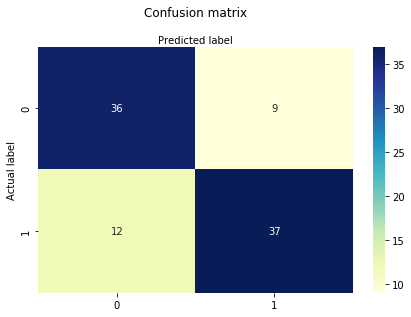

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Log loss= ",log_loss(y_test, prediction_probabilities))

Accuracy: 0.776595744680851
Precision: 0.8043478260869565
Recall: 0.7551020408163265
Log loss=  0.49764652638486256


In [39]:
# Retrieve the non-normalized game stats
prediction_probabilities[:,1]
pred_probs = pd.Series(prediction_probabilities[:,1], index=X_test.index)
predictions = pd.Series(y_pred, index=y_test.index)
test_games = tourney_data[tourney_data.index.isin(X_test.index)].copy()

test_games[numeric_feature_to_scale] = scaler.inverse_transform(test_games[numeric_feature_to_scale])
test_games['predicted_result'] = predictions
test_games['pred_win_prob'] = pred_probs

test_games.head()

,season_t,round,game_date,team_seed,team,team_id_t,opp_team_seed,opp_team,opp_team_id,game_result,start_season,School_t,Games_t,SRS_t,SOS_t,win_pct_t,pts_avg_t,opp_pts_avg_t,fg_pct_t,allow_fg_pct_t,ft_pct_t,allow_ft_att_avg_t,poss_avg_t,off_rebs_avg_t,allow_off_rebs_avg_t,def_rebs_avg_t,allow_def_rebs_avg_t,to_avg_t,steal_avg_t,off_rating_t,ft_att_avg_t,season_o,School_o,team_id_o,Games_o,SRS_o,SOS_o,win_pct_o,pts_avg_o,opp_pts_avg_o,fg_pct_o,allow_fg_pct_o,ft_pct_o,allow_ft_att_avg_o,poss_avg_o,off_rebs_avg_o,allow_off_rebs_avg_o,def_rebs_avg_o,allow_def_rebs_avg_o,to_avg_o,steal_avg_o,off_rating_o,ft_att_avg_o,conf_name_t,conf_name_o,top_conf,upset_seed_threshold,srs_sqr_t,srs_sqr_o,off_rating_sqr_t,off_rating_sqr_o,predicted_result,pred_win_prob
9,2016,64,2016-03-18,10,Virginia Commonwealth,c1c1e6df-a383-4fbd-ba7b-32d4f9ef9518,7,Oregon State,532d3874-b4b3-4c5c-acc6-749a6db26c8f,1,2015,Virginia Commonwealth,36,13.83,4.35,0.694,77.0,67.0,0.451,0.440,0.692,20.0,81.427778,12.0,9.0,25.0,25.0,11.0,8.0,94.562325,20.0,2015,Oregon State,532d3874-b4b3-4c5c-acc6-749a6db26c8f,32,10.39,9.26,0.594,71.0,70.0,0.440,0.428,0.671,21.0,77.462500,10.0,11.0,23.0,25.0,11.0,7.0,91.657254,21.0,Atlantic 10,Pacific 12,-1,0,191.2689,107.9521,8942.033342,8401.052121,1,0.754163
21,2014,32,2014-03-23,6,Baylor,db6e1cab-3fa3-4a93-a673-8b2a358ff4bf,3,Creighton,7d797407-623e-476d-b299-46de4275414d,1,2013,Baylor,38,15.80,10.11,0.684,74.0,67.0,0.455,0.425,0.680,18.0,77.042105,13.0,11.0,24.0,20.0,11.0,5.0,96.051373,24.0,2013,Creighton,7d797407-623e-476d-b299-46de4275414d,35,18.03,7.17,0.771,78.0,67.0,0.497,0.426,0.743,18.0,72.302857,8.0,9.0,25.0,21.0,9.0,3.0,107.879554,18.0,Big 12,Big East,1,0,249.6400,325.0809,9225.866282,11637.998236,0,0.385844
34,2016,64,2016-03-18,16,Holy Cross,31aedd91-a77e-46c1-8bdc-80e9860c159d,1,Oregon,1da70895-f77f-44ef-b216-d63c02e696eb,0,2015,Holy Cross,35,-11.20,-6.11,0.429,64.0,69.0,0.412,0.459,0.687,17.0,72.462857,7.0,9.0,22.0,26.0,11.0,6.0,88.321110,19.0,2015,Oregon,1da70895-f77f-44ef-b216-d63c02e696eb,38,18.05,8.64,0.816,78.0,68.0,0.467,0.423,0.715,18.0,79.563158,11.0,10.0,24.0,22.0,11.0,7.0,98.035324,23.0,Patriot League,Pacific 12,-1,1,125.4400,325.8025,7800.618528,9610.924844,0,0.054122
40,2016,64,2016-03-18,9,Cincinnati,a17dfc54-415f-49c3-a2e6-d6fa9db18b0a,8,Saint Joseph's (PA),f9e4261e-d11d-46c4-bd33-c7bbc94ef0e8,0,2015,Cincinnati,33,15.19,5.25,0.667,73.0,63.0,0.430,0.393,0.705,15.0,78.975758,13.0,11.0,25.0,23.0,11.0,7.0,92.433428,19.0,2015,Saint Joseph's,f9e4261e-d11d-46c4-bd33-c7bbc94ef0e8,36,12.10,4.93,0.778,77.0,70.0,0.453,0.417,0.716,15.0,78.622222,9.0,9.0,28.0,25.0,9.0,5.0,97.936687,22.0,American Athletic,Atlantic 10,0,0,230.7361,146.4100,8543.938608,9591.594737,1,0.777834
43,2012,64,2012-03-15,5,New Mexico,1b1977ec-b32f-4ce3-95a4-d07bab4816cd,12,Long Beach State,11a617d5-af03-4cce-bc8a-51114d9e41fe,1,2011,New Mexico,35,15.60,3.34,0.800,72.0,59.0,0.462,0.384,0.707,16.0,76.120000,11.0,10.0,23.0,21.0,13.0,6.0,94.587493,21.0,2011,Long Beach State,11a617d5-af03-4cce-bc8a-51114d9e41fe,34,9.52,0.87,0.735,73.0,63.0,0.468,0.421,0.670,15.0,77.529412,11.0,10.0,22.0,21.0,12.0,7.0,94.157815,23.0,Mountain West,Big West,0,1,243.3600,90.6304,8946.793913,8865.694101,1,0.542388


In [40]:
missed_predictions = test_games[test_games['game_result'] != 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)
missed_predictions[['predicted_result','game_result','pred_win_prob','team','team_seed','conf_name_t', 'opp_team','opp_team_seed', 
                    'conf_name_o','top_conf','season_t','round']]

print("Total missed predictions= ", missed_predictions.shape[0])

Total missed predictions=  21


#### Missed predictions where higher seed was upset

In [41]:
f_list=['season_t','round', 'team_seed','team','opp_team','opp_team_seed','game_result','predicted_result']

cond_1 = ((missed_predictions['team_seed'] > missed_predictions['opp_team_seed']) & 
          (missed_predictions['game_result'] == 1))

cond_2 = ((missed_predictions['team_seed'] < missed_predictions['opp_team_seed']) &  
          (missed_predictions['game_result'] == 0))

upset_seeds = missed_predictions[cond_2 | cond_1][f_list]
upset_seeds

,season_t,round,team_seed,team,opp_team,opp_team_seed,game_result,predicted_result
434,2016,64,3,West Virginia,Stephen F. Austin,14,0,1
288,2014,16,4,Louisville,Kentucky,8,0,1
170,2012,8,1,Syracuse,Ohio State,2,0,1
238,2016,64,6,Texas,Northern Iowa,11,0,1
197,2011,64,11,Gonzaga,St. John's,6,1,0
21,2014,32,6,Baylor,Creighton,3,1,0
319,2012,32,11,North Carolina State,Georgetown,3,1,0
99,2016,8,10,Syracuse,Virginia,1,1,0
155,2017,64,11,USC,SMU,6,1,0
201,2014,32,10,Stanford,Kansas,2,1,0


In [42]:
for index, row in upset_seeds.iterrows():
    print_game_info(test_games, row['season_t'], row['round'], row['team'])
    print("------\n")



		 West Virginia 	 Stephen F. Austin
Seed 		      3 	     14
PPG 		  78.00 	  80.00
Allow PPG 	  66.00 	  63.00
Poss Avg 	  85.39 	  80.10
FG % 		  44.90 	  47.80
Allow FG % 	  42.40 	  43.80
Off Rb Avg 	  15.00 	  11.00
Allow Off Rb Avg   8.00 	   9.00
Def Rb Avg 	  23.00 	  23.00
Allow Def Rb Avg  22.00 	  22.00
FT ATT Avg 	  27.00 	  20.00
Allow FT ATT Avg  27.00 	  20.00
FT % 		  67.30 	  73.50
Turnover Avg 	  14.00 	  12.00
Takeaway Avg 	   9.00 	   9.00
Win % 		  74.30 	  82.40
Off Rating 	  91.34 	  99.88
SRS Rating 	  21.61 	   9.23


Top Conference=  1
Game Result=  0  (One indicates win for  West Virginia )
Predicted Result=  1
Predicted Probability=   0.760
------

		 Louisville 	 Kentucky
Seed 		      4 	      8
PPG 		  81.00 	  74.00
Allow PPG 	  61.00 	  66.00
Poss Avg 	  80.84 	  78.51
FG % 		  47.10 	  45.40
Allow FG % 	  39.60 	  41.10
Off Rb Avg 	  13.00 	  14.00
Allow Off Rb Avg  11.00 	  10.00
Def Rb Avg 	  24.00 	  26.00
Allow Def Rb Avg  23.00 	  19.00
FT ATT Avg 

In [43]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

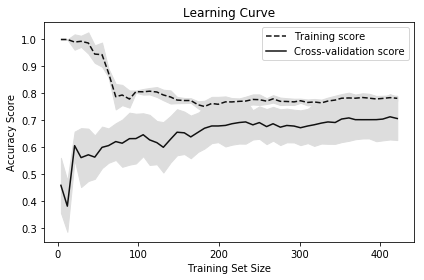

In [44]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [47]:
scores = cross_val_score(LogisticRegression(), X,y, cv=10, scoring='accuracy')
print(scores.mean())

0.7107423681776133
